In [4]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
#reading the file
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
#to get basic information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the above info we know:
  1.'id' - has 5110 unique values
  2.gender,ever_married,work_type,Residence_type,stroke are categorical
  

In [13]:
#finding missing values
print("Missing values {}".format(df.isna().sum().sum()))

Missing values 201


In [15]:
missing = df.isnull().sum()
missing

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [18]:
#All 201 values are from the bmi column
#replace the missing values with the mean of bmi
df.bmi.replace(to_replace = np.nan, value = df.bmi.mean(),inplace = True)


In [20]:
#identify the outliers
bmi_outliers = df[df['bmi']>50]
bmi_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
113,41069,Female,45.0,0,0,Yes,Private,Rural,224.10,56.6,never smoked,1
254,32257,Female,47.0,0,0,Yes,Private,Urban,210.95,50.1,Unknown,0
258,28674,Female,74.0,1,0,Yes,Self-employed,Urban,205.84,54.6,never smoked,0
270,72911,Female,57.0,1,0,Yes,Private,Rural,129.54,60.9,smokes,0
333,1703,Female,52.0,0,0,Yes,Private,Urban,82.24,54.7,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4650,68074,Male,54.0,0,0,Yes,Private,Rural,100.47,50.2,formerly smoked,0
4779,65892,Female,58.0,0,0,Yes,Self-employed,Urban,66.71,51.7,never smoked,0
4838,5131,Female,51.0,0,0,Yes,Private,Urban,107.72,60.9,Unknown,0
4906,72696,Female,53.0,0,0,Yes,Private,Urban,70.51,54.1,never smoked,0


The dataset has 79 Outliers in total.
We can replace the bmi outliers with mean

In [21]:
df["bmi"] = df["bmi"].apply(lambda x: df.bmi.mean() if x>50 else x)

In [22]:
# Aanalysing the gender column
gender_outliers = df[df['gender'] == 'Other']
gender_outliers

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


There is a single value representing other . so we can replace it with male or female  . Here I replace it with male

In [23]:
df['gender'] = df['gender'].replace('Other','Male')

Creating a pie chart for the dataset's outcome distribution 'Stroke'

Text(0.5, 1.0, 'Stroke')

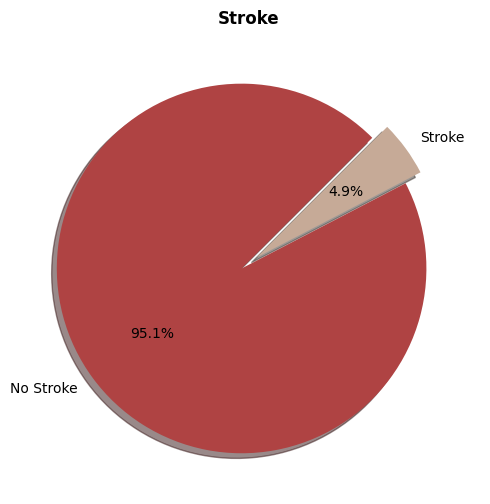

In [25]:
fig , ax = plt.subplots(1,1 , figsize = (6,6))
labels = ['No Stroke' , 'Stroke']
values = df['stroke'].value_counts().tolist()
explode = (0.05,0.05)
colors = ['#AF4343', '#C6AA97']

ax.pie(x = values , labels = labels , autopct = "%1.1f%%", shadow = True , startangle = 45 , explode = explode , colors = colors)
ax.set_title('Stroke', fontdict = {"fontsize":12},fontweight= 'bold')

Text(0.5, 1.0, 'Hypertension')

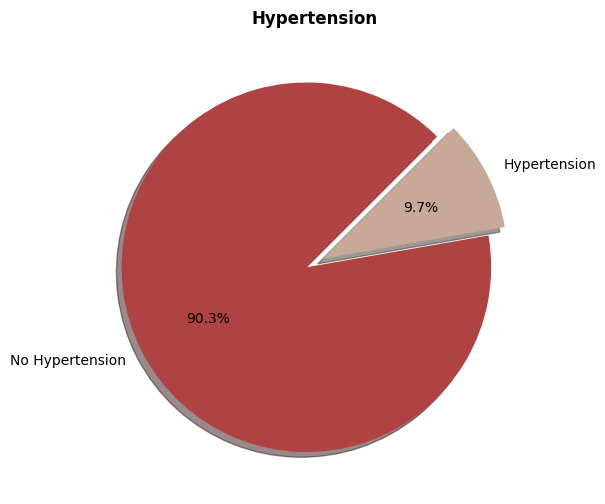

In [26]:
fig , ax = plt.subplots(1,1 , figsize = (6,6))
labels = ['No Hypertension' , 'Hypertension']
values = df['hypertension'].value_counts().tolist()
explode = (0.05,0.05)
colors = ['#AF4343', '#C6AA97']

ax.pie(x = values , labels = labels , autopct = "%1.1f%%", shadow = True , startangle = 45 , explode = explode , colors = colors)
ax.set_title('Hypertension', fontdict = {"fontsize":12},fontweight= 'bold')

Text(0.5, 1.0, 'Heart Disease')

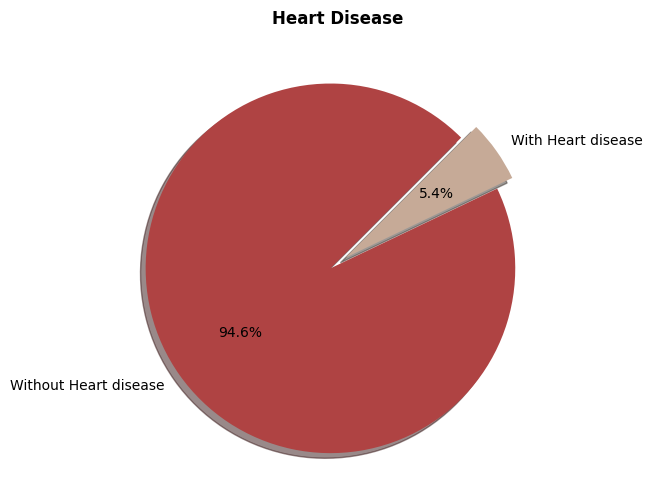

In [28]:
fig , ax = plt.subplots(1,1 , figsize = (6,6))
labels = ['Without Heart disease' , 'With Heart disease']
values = df['heart_disease'].value_counts().tolist()
explode = (0.05,0.05)
colors = ['#AF4343', '#C6AA97']

ax.pie(x = values , labels = labels , autopct = "%1.1f%%", shadow = True , startangle = 45 , explode = explode , colors = colors)
ax.set_title('Heart Disease', fontdict = {"fontsize":12},fontweight= 'bold')